In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Grayscale Image


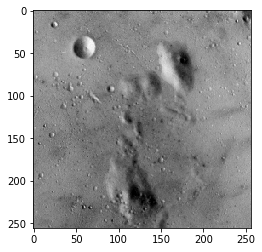

In [2]:
print(color.PURPLE + color.BOLD + 'Grayscale Image'+ color.END + color.END)
img1 = mpimg.imread('moon.tiff')
imgplot_1 = plt.imshow(img1,cmap=plt.cm.gray,vmin=0,vmax=255)

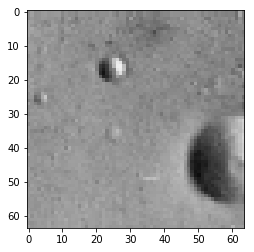

In [89]:
#64x64 resolution
imgplot_64 = plt.imshow(img1[0:64,0:64],cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()

In [3]:
def dft_principles(arr):
    rows,cols = np.shape(arr)
    #print(rows,cols)
    I_dft = np.zeros((rows,cols),dtype=np.complex_)
    for u in range(rows):
        for v in range(cols):
            temp = 0
            temp_r = 0
            temp_i = 0
            for i in range(rows):
                for j in range(cols):
                    temp_r += arr[i][j]*np.cos(2*np.pi*((i*u/rows)+(j*v/cols)))
                    temp_i += arr[i][j]*np.sin(2*np.pi*((i*u/rows)+(j*v/cols)))
            temp = complex(temp_r,-temp_i)
            #print(temp)
            I_dft[u][v] = temp
    return I_dft     

In [4]:
print(color.PURPLE + color.BOLD + '#1.1.1 '+ color.END + color.END)
img1_dft_pri = dft_principles(img1[0:64,0:64])
print(img1_dft_pri)

#1.1.1 
[[ 5.78120000e+05    -0.j         -6.57996593e+03-18574.25216589j
   4.61358371e+03-19437.60260758j ...  1.52476573e+04 +1883.73592589j
   4.61358371e+03+19437.60260758j -6.57996593e+03+18574.25216589j]
 [ 3.57944782e+03 +3613.94133129j  1.21030292e+04 -6819.44120199j
   4.75497040e+03 +8465.47559557j ... -1.25158790e+03+16105.38211793j
  -1.54115657e+04 +2760.83194095j -6.74736893e+03-15523.84657901j]
 [ 9.35641731e+03 +8149.75500898j  2.29440252e+03 +2566.67096706j
  -6.41513139e+03 +4923.75364606j ... -5.54926081e+03 -3726.19604117j
  -4.48032143e+03-14793.61347002j  9.71574151e+03 -8691.61676937j]
 ...
 [-1.48740511e+03 -9622.51267372j  6.33780310e+03 -3111.57740429j
   4.59589515e+03  -509.12475423j ... -3.65774322e+02 -1049.14421634j
   2.06047341e+03  -229.74590751j -4.39370551e+03  +815.120974j  ]
 [ 9.35641731e+03 -8149.75500898j  9.71574151e+03 +8691.61676937j
  -4.48032143e+03+14793.61347002j ... -1.04335377e+03 +7575.99164698j
  -6.41513139e+03 -4923.75364607j  2.29

In [5]:
def dft_matrix(arr):
    rows,cols = np.shape(arr)
    basis = np.zeros((rows,cols),dtype=np.complex_)
    for u in range(rows):
        for v in range(cols):
            basis[u][v] = np.exp((-1j*2*np.pi/(rows))*(u*v))
    res = np.matmul(basis,arr)
    res = np.matmul(res,basis)
    return res

In [6]:
print(color.PURPLE + color.BOLD + '#1.1.2 '+ color.END + color.END)
img1_dft_mat = dft_matrix(img1[0:64,0:64])
print(img1_dft_mat)

#1.1.2 
[[ 5.78120000e+05    +0.j         -6.57996593e+03-18574.25216589j
   4.61358371e+03-19437.60260758j ...  1.52476573e+04 +1883.73592589j
   4.61358371e+03+19437.60260758j -6.57996593e+03+18574.25216589j]
 [ 3.57944782e+03 +3613.94133129j  1.21030292e+04 -6819.44120199j
   4.75497040e+03 +8465.47559557j ... -1.25158790e+03+16105.38211793j
  -1.54115657e+04 +2760.83194095j -6.74736893e+03-15523.84657901j]
 [ 9.35641731e+03 +8149.75500898j  2.29440252e+03 +2566.67096706j
  -6.41513139e+03 +4923.75364606j ... -5.54926081e+03 -3726.19604117j
  -4.48032143e+03-14793.61347002j  9.71574151e+03 -8691.61676937j]
 ...
 [-1.48740511e+03 -9622.51267372j  6.33780310e+03 -3111.57740429j
   4.59589515e+03  -509.12475423j ... -3.65774322e+02 -1049.14421634j
   2.06047341e+03  -229.74590751j -4.39370551e+03  +815.120974j  ]
 [ 9.35641731e+03 -8149.75500898j  9.71574151e+03 +8691.61676937j
  -4.48032143e+03+14793.61347002j ... -1.04335377e+03 +7575.99164698j
  -6.41513139e+03 -4923.75364607j  2.29

In [90]:
def idft_matrix(arr):
    rows,cols = np.shape(arr)
    basis = np.zeros((rows,cols),dtype=np.complex_)
    for u in range(rows):
        for v in range(cols):
            basis[u][v] = np.exp((1j*2*np.pi/(rows))*(u*v))
    res = np.matmul(basis,arr)
    res = np.matmul(res,basis)
    res = res / (rows**2)
    return res

In [27]:
def magphase(arr):
    rows,cols = np.shape(arr)
    mag = np.zeros((rows,cols))
    phase = np.zeros((rows,cols))
    for u in range(rows):
        for v in range(cols):
            mag[u][v] = np.absolute(arr[u][v])
            phase[u][v] = np.angle(arr[u][v],deg=True)
    return mag,phase

#1.2.1 


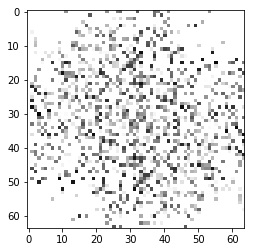

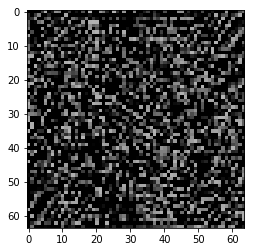

In [34]:
print(color.PURPLE + color.BOLD + '#1.2.1 '+ color.END + color.END)
img1_dft_mag,img1_dft_phase = magphase(img1_dft_mat)
#mag part of DFT as an image
imgplot_2 = plt.imshow(img1_dft_mag,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#phase part of IDFT as an image
imgplot_3 = plt.imshow(img1_dft_phase,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()

In [29]:
def logcomp(arr):
    a = []
    for i in range(len(arr)):
        t = np.log((arr[i])+1)
        if(t > 255):
            t = 255
        if(t < 0):
            t = 0
        a.append(t)
    return a

In [30]:
img1_dft_maglog = list(map(logcomp,img1_dft_mag))
smallest = np.amin(img1_dft_maglog)
biggest = np.amax(img1_dft_maglog)
print(color.PURPLE + color.BOLD + 'Smallest Pixel Value :'+ color.END + color.END,smallest)
print(color.PURPLE + color.BOLD + 'Largest Pixel Value :'+ color.END + color.END,biggest)

Smallest Pixel Value : 1.9351720765242315
Largest Pixel Value : 13.267538468305972


In [36]:
def fscs(arr):
    a = []
    P = 255/(13.267538468305972-1.9351720765242315)
    L = -(1.9351720765242315)*(255/(13.267538468305972-1.9351720765242315))
    for i in range(len(arr)):
        t = (arr[i]*P)+L
        if(t > 255):
            t = 255
        if(t < 0):
            t = 0
        a.append(t)
    return a

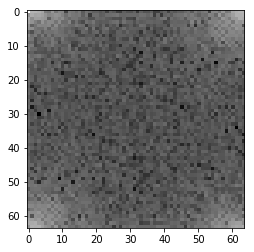

In [52]:
img1_dft_maglogfscs = list(map(fscs,img1_dft_maglog))
imgplot_4 = plt.imshow(img1_dft_maglogfscs,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#Magnitude part of DFT after log compression

In [64]:
def shift(arr):
    rows,cols = np.shape(arr)
    shifted = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            shifted[i][j] = ((-1)**(i+j))*arr[i][j]
    return shifted
            

#1.2.2


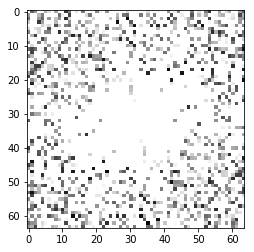

In [42]:
print(color.PURPLE + color.BOLD + '#1.2.2'+ color.END + color.END)
img1_shifted = shift(img1[0:64,0:64])
img1_dft_shift = dft_matrix(img1_shifted)
img1_s_mag,img1_s_phase = magphase(img1_dft_shift)
imgplot_5 = plt.imshow(img1_s_mag,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()

In [62]:
def round_complex(arr):
    rows,cols = np.shape(arr)
    rounded = np.zeros((rows,cols),dtype=np.complex_)
    for i in range(rows):
        for j in range(cols):
            rounded[i][j] =  round(arr[i][j].real) + round(arr[i][j].imag) * 1j
    return rounded

In [65]:
print(color.PURPLE + color.BOLD + '#1.2.3'+ color.END + color.END)
idn = np.identity(64)
idn_dft = dft_matrix(idn)
idn_dft_idft = idft_matrix(idn_dft)
idn_dft_idft_r = round_complex(idn_dft_idft)
print(idn_dft_idft_r)

#1.2.3
[[ 1.+0.j  0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j  1.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ...  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -0.+0.j  1.+0.j]]


In [73]:
def set_to_zero(a,b):
    rows,cols = np.shape(a)
    m = np.zeros((rows,cols),dtype=np.complex_)
    for i in range(rows):
        for j in range(cols):
            m[i][j] = a[i][j] * np.exp(1j*0)
    return m

In [74]:
def addnoise(a,b):
    rows,cols = np.shape(a)
    m = np.zeros((rows,cols),dtype=np.complex_)
    for i in range(rows):
        for j in range(cols):
            noise = random.uniform(0, 1)
            m[i][j] = a[i][j] * np.exp(1j*b[i][j]*noise)
    return m

#1.2.4


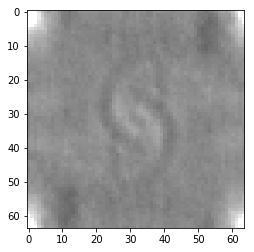

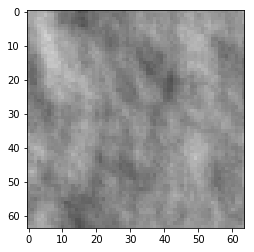

In [88]:
print(color.PURPLE + color.BOLD + '#1.2.4'+ color.END + color.END)
img1_dft_zero = set_to_zero(img1_dft_mag,img1_dft_phase)
img1_dft_noise = addnoise(img1_dft_mag,img1_dft_phase)
img1_z_idft = idft_matrix(img1_dft_zero)
img1_n_idft = idft_matrix(img1_dft_noise)

img1_z_idft = round_complex(img1_z_idft)
img1_n_idft = round_complex(img1_n_idft)
#print(img1_z_idft.real)
imgplot_6 = plt.imshow(img1_z_idft.real,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
imgplot_7 = plt.imshow(img1_n_idft.real,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#Making phase part as zero and reconstructing
#Adding noise to phase part and reconstructing

In [97]:
def circ_conv(arr1,arr2):
    rows1,cols1 = np.shape(arr1)
    rows2,cols2 = np.shape(arr2)
    conv = np.zeros((rows1,cols1))
    for i in range(rows1):
        for j in range(cols1):
            s = 0
            for u in range(rows2):
                for v in range(cols2):
                    s += arr1[(i-u)%rows1][(j-v)%cols1]*arr2[u][v]
            conv[i][j] = s
    return conv

#2.1


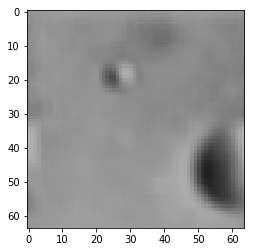

In [98]:
print(color.PURPLE + color.BOLD + '#2.1'+ color.END + color.END)
avg5 = np.ones((5,5))
avg5 = avg5/25
#Considering the sub-matrix of size 64x64 from the original image 
conv1 = circ_conv(img1[0:64,0:64],avg5)
imgplot_8 = plt.imshow(conv1,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#Circular convolution with 5x5 averaging filter

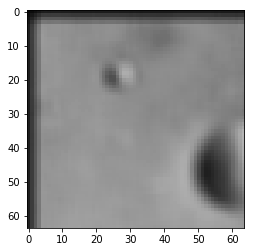

In [101]:
print(color.PURPLE + color.BOLD + '#2.2'+ color.END + color.END)
#Using the same Circular Convolution definition to perform Linear Covolution after Zero Padding the bigger Image
padded_img1 = np.zeros((128,128))
padded_img1[0:64,0:64] = img1[0:64,0:64]
conv2 = circ_conv(padded_img1,avg5)
imgplot_9 = plt.imshow(conv2[0:64,0:64],cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#Linearly Convolution of two Images

#2.3


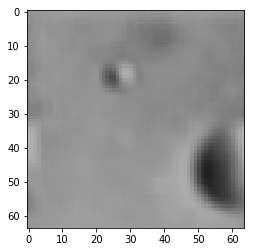

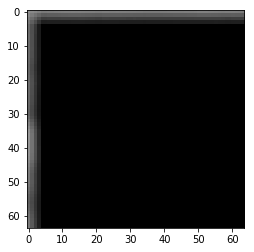

In [110]:
print(color.PURPLE + color.BOLD + '#2.3'+ color.END + color.END)
padded_img2 = np.zeros((64,64))
padded_img2[0:5,0:5] = avg5
pad_dft_2 = dft_matrix(padded_img2)
pad_dft_mul = np.multiply(img1_dft_mat,pad_dft_2)
pad_idft = idft_matrix(pad_dft_mul)
imgplot_10 = plt.imshow(pad_idft.real,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#Difference between both the Images
imgplot_11 = plt.imshow(pad_idft.real - conv2[0:64,0:64],cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()

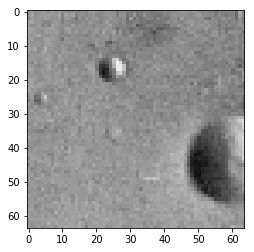

In [112]:
print(color.PURPLE + color.BOLD + '#3.1'+ color.END + color.END)
img1_64 = img1[0:64,0:64]
awgn = np.random.normal(0,5,64*64)
awgn = awgn.reshape((64,64))
img1_64_n = np.add(img1_64,awgn)
imgplot_12 = plt.imshow(img1_64_n,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()
#64X64 with AWGN noise added to it 

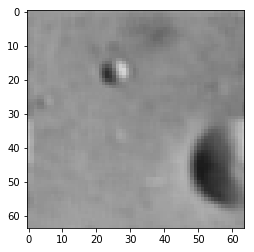

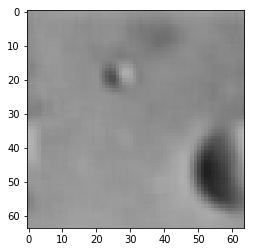

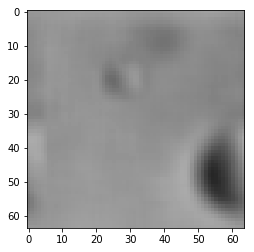

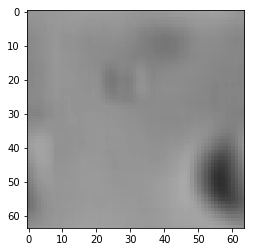

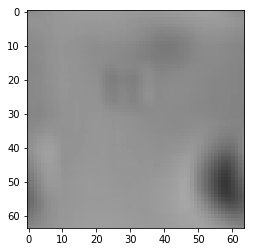

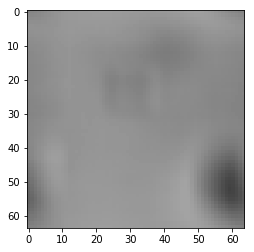

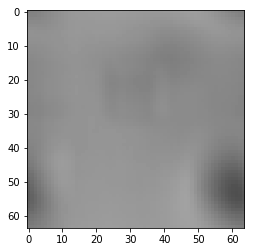

In [113]:
img1_64_n_dft = dft_matrix(img1_64_n)
#Denoising using average filter for varying sizes
for M in range(3,17,2):
    avg = np.ones((M,M))
    avg = avg/(M*M)
    padded_img3 = np.zeros((64,64))
    padded_img3[0:M,0:M] = avg
    padded_img3_dft = dft_matrix(padded_img3)
    imgplot_12 = plt.imshow(idft_matrix(np.multiply(padded_img3_dft,img1_64_n_dft)).real,cmap=plt.cm.gray,vmin=0,vmax=255)
    plt.show()
    

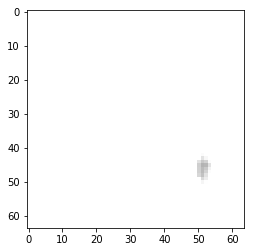

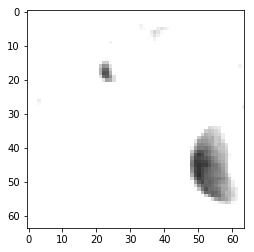

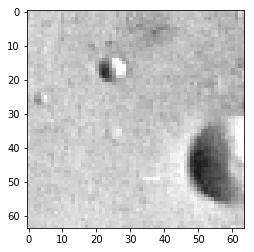

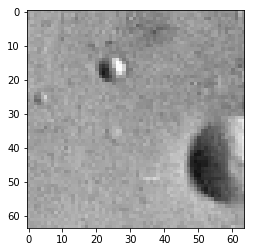

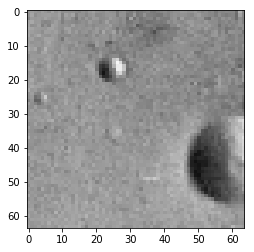

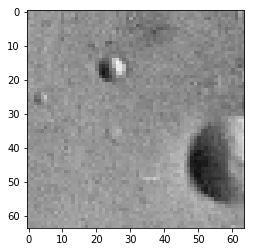

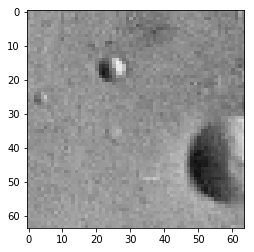

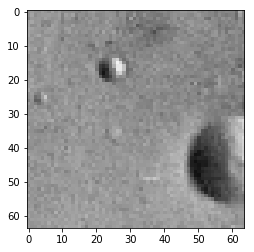

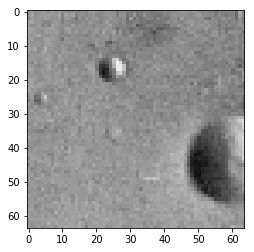

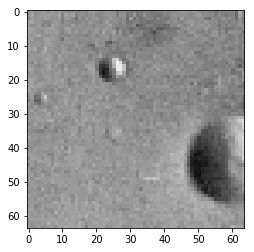

In [114]:
#Denoising using gaussian filter for varying sigma
for sig in range(1,11):
    sig = sig/2
    gauss = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            gauss[i][j] = np.exp(-2*((np.pi*sig)**2)*((i**2+j**2)/25))
    padded_img4 = np.zeros((64,64))
    padded_img4[0:5,0:5] = gauss
    padded_img4_dft = dft_matrix(padded_img4)
    imgplot_13 = plt.imshow(idft_matrix(np.multiply(padded_img4_dft,img1_64_n_dft)).real,cmap=plt.cm.gray,vmin=0,vmax=255)
    plt.show()